In [101]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [103]:
df=pd.read_csv(r'D:\ML\Cust_Segmentation - Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [105]:
df1=df[['Income','DebtIncomeRatio']]
df1.head()

,Income,DebtIncomeRatio
0,19,6.3
1,100,12.8
2,57,20.9
3,19,6.3
4,253,7.2


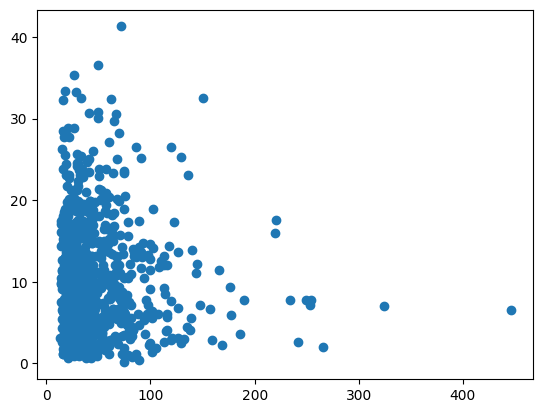

In [107]:
plt.scatter(df1['Income'],df1['DebtIncomeRatio'])
plt.show()

In [109]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [111]:
y_predicted=km.fit_predict(df1[['Income','DebtIncomeRatio']])
y_predicted

array([0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [113]:
df1['cluster']=y_predicted
df1.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21796\3342344887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster']=y_predicted


,Income,DebtIncomeRatio,cluster
0,19,6.3,0
1,100,12.8,1
2,57,20.9,0
3,19,6.3,0
4,253,7.2,2


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21796\4176113716.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


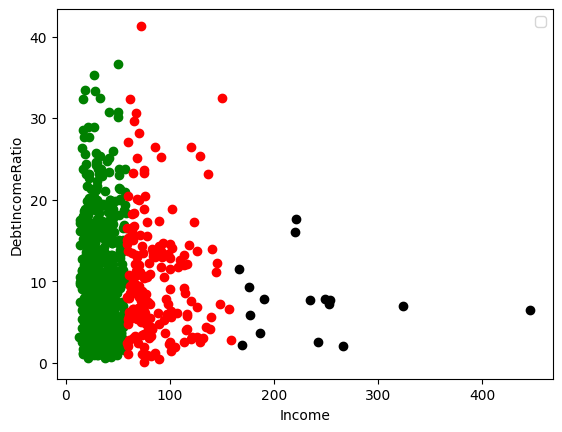

In [115]:
df2=df1[df1.cluster==0]
df3=df1[df1.cluster==1]
df4=df1[df1.cluster==2]
plt.scatter(df2['Income'],df2['DebtIncomeRatio'],color='green')
plt.scatter(df3['Income'],df3['DebtIncomeRatio'],color='red')
plt.scatter(df4['Income'],df4['DebtIncomeRatio'],color='black')
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.legend()
plt.show()

In [117]:
scaler=MinMaxScaler()
scaler.fit(df1[['Income']])
df1['Income']=scaler.transform(df1[['Income']])
scaler.fit(df1[['DebtIncomeRatio']])
df1['DebtIncomeRatio']=scaler.transform(df1[['DebtIncomeRatio']])
df1

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21796\687569493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Income']=scaler.transform(df1[['Income']])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21796\687569493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DebtIncomeRatio']=scaler.transform(df1[['DebtIncomeRatio']])


,Income,DebtIncomeRatio,cluster
0,0.013857,0.150485,0
1,0.200924,0.308252,1
2,0.101617,0.504854,0
3,0.013857,0.150485,0
4,0.554273,0.172330,2
...,...,...,...
845,0.030023,0.162621,0
846,0.048499,0.167476,0
847,0.011547,0.808252,0
848,0.034642,0.067961,0


In [121]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df1[['Income','DebtIncomeRatio']])
y_predicted

array([1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 2,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [123]:
df1['cluster1']=y_predicted
df1.drop('cluster',axis='columns',inplace=True)
df1

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21796\1804048058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster1']=y_predicted
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21796\1804048058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('cluster',axis='columns',inplace=True)


,Income,DebtIncomeRatio,cluster1
0,0.013857,0.150485,1
1,0.200924,0.308252,2
2,0.101617,0.504854,0
3,0.013857,0.150485,1
4,0.554273,0.172330,2
...,...,...,...
845,0.030023,0.162621,1
846,0.048499,0.167476,1
847,0.011547,0.808252,0
848,0.034642,0.067961,1


In [125]:
km.cluster_centers_

array([[0.06736104, 0.44769466],
       [0.05525026, 0.1571273 ],
       [0.30687067, 0.17741201]])

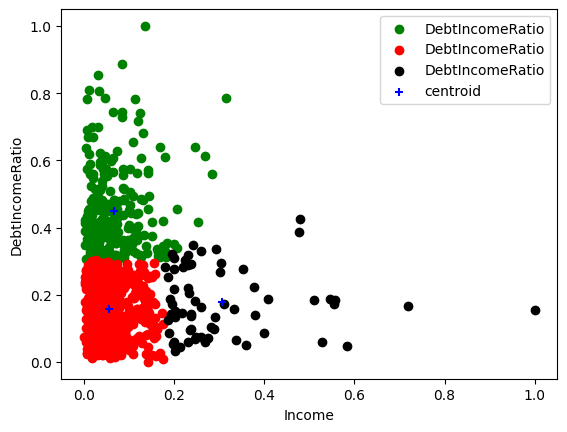

In [127]:
df2=df1[df1.cluster1==0]
df3=df1[df1.cluster1==1]
df4=df1[df1.cluster1==2]
plt.scatter(df2['Income'],df2['DebtIncomeRatio'],label='DebtIncomeRatio',color='green')
plt.scatter(df3['Income'],df3['DebtIncomeRatio'],label='DebtIncomeRatio',color='red')
plt.scatter(df4['Income'],df4['DebtIncomeRatio'],label='DebtIncomeRatio',color='black')
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='+',label='centroid')
plt.legend()
plt.show()

In [129]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df1[['Income','DebtIncomeRatio']])
    sse.append(km.inertia_)

In [131]:
sse

[29.309935490820706,
 14.377735390746471,
 10.91759680562514,
 7.294374793391123,
 5.720040431998267,
 4.749912658046549,
 4.113037193635283,
 3.5179866240494704,
 3.0945092315862848]

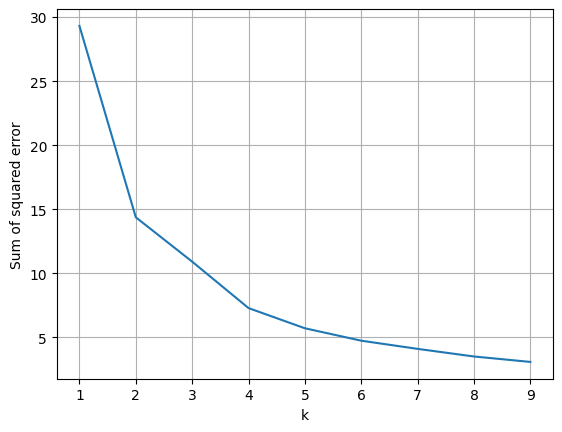

In [133]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.grid(True)
plt.show()

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from mpl_toolkits.mplot3d import Axes3D

In [137]:
features = ['Income', 'DebtIncomeRatio', 'Age']  # Change according to your dataset columns
data = df[features]
data

,Income,DebtIncomeRatio,Age
0,19,6.3,41
1,100,12.8,47
2,57,20.9,33
3,19,6.3,29
4,253,7.2,47
...,...,...,...
845,26,6.8,27
846,34,7.0,28
847,18,33.4,25
848,28,2.9,32


In [139]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [141]:
kmeans_euclidean = KMeans(n_clusters=3, random_state=42)
clusters_euclidean = kmeans_euclidean.fit_predict(scaled_data)

In [143]:
manhattan_distances = pairwise_distances(scaled_data, metric='manhattan')
kmeans_manhattan = KMeans(n_clusters=3, random_state=42)
clusters_manhattan = kmeans_manhattan.fit_predict(manhattan_distances)

In [145]:
df['Cluster_Euclidean'] = clusters_euclidean
df['Cluster_Manhattan'] = clusters_manhattan

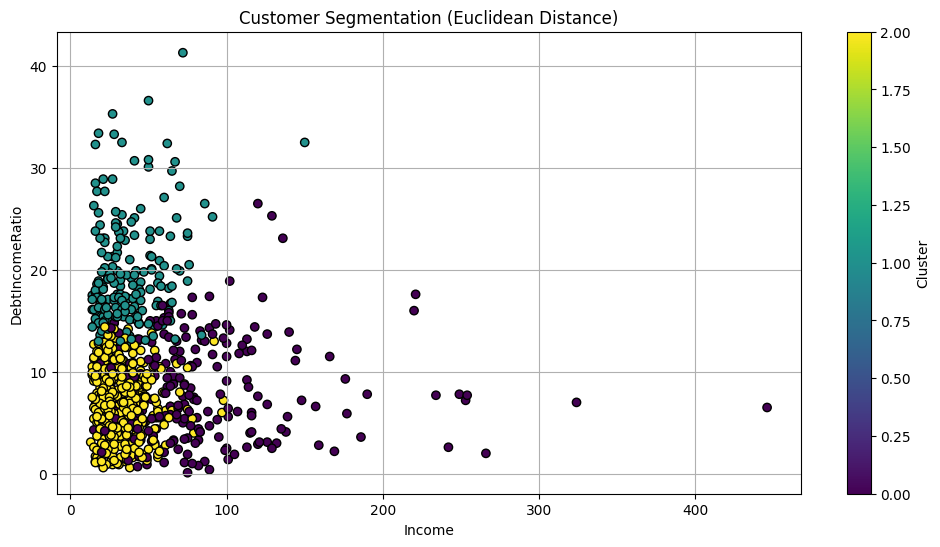

In [147]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Income'], df['DebtIncomeRatio'], c=df['Cluster_Euclidean'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.title('Customer Segmentation (Euclidean Distance)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

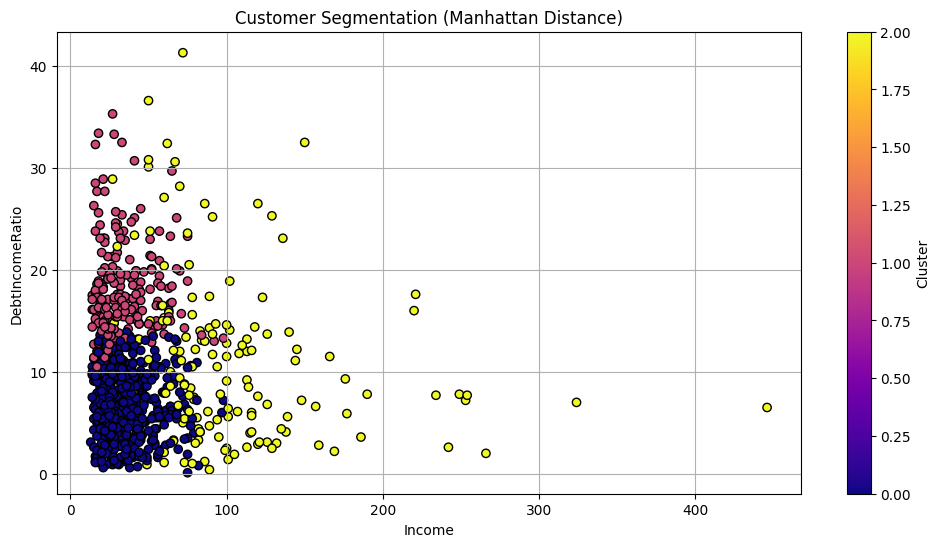

In [149]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Income'], df['DebtIncomeRatio'], c=df['Cluster_Manhattan'], cmap='plasma', marker='o', edgecolor='k')
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.title('Customer Segmentation (Manhattan Distance)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

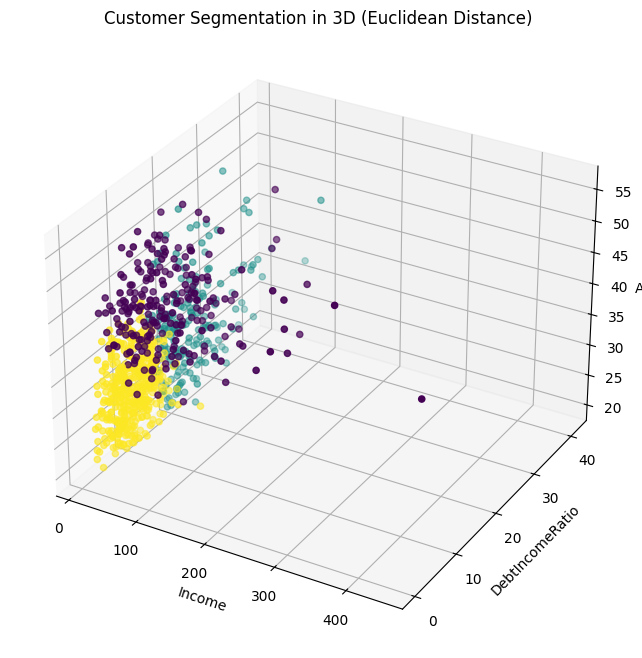

In [151]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Income'], df['DebtIncomeRatio'], df['Age'], c=df['Cluster_Euclidean'], cmap='viridis', marker='o')
ax.set_xlabel('Income')
ax.set_ylabel('DebtIncomeRatio')
ax.set_zlabel('Age')
ax.set_title('Customer Segmentation in 3D (Euclidean Distance)')
plt.show()

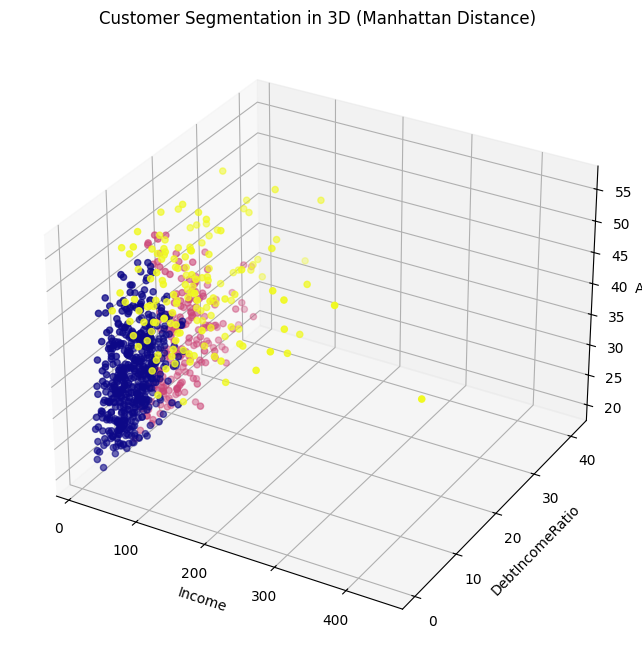

In [153]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Income'], df['DebtIncomeRatio'], df['Age'], c=df['Cluster_Manhattan'], cmap='plasma', marker='o')
ax.set_xlabel('Income')
ax.set_ylabel('DebtIncomeRatio')
ax.set_zlabel('Age')
ax.set_title('Customer Segmentation in 3D (Manhattan Distance)')
plt.show()